## MNIST dataset using Stacked Autoencoders

In this notebook, I will be using Stacked Autoencoders on MNIST dataset. I will train the model using mnist dataset and then visualize the test results so that we can see how well the autoencoder has learned to represent the input data. 

### Basic Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Loading the data 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Constants 

I am trying to reduce the input features dimension by half.

In [4]:
input_dim = 784   # 28*28
hidden_dim_1 = 392 
hidden_dim_2 = 196
hidden_dim_3 = hidden_dim_1 # Decoder Begins
output_dim = input_dim
learning_rate = 0.01

num_of_epochs = 10
batch_size = 128

### Placeholder

Not targer placeholder here

In [5]:
X = tf.placeholder(tf.float32, shape=[None, input_dim])

### Weights 

In [6]:
initializer = tf.variance_scaling_initializer()

# Initializer capable of adapting its scale to the shape of weights tensors.

In [7]:
# normally we would use tf.variables_initializer but here, 
# since we are initializing our variables with tf.variance_scaling_initializer() we will just use tf.Variable

w1 = tf.Variable(initializer(shape=[input_dim,hidden_dim_1],dtype=tf.float32))
w2 = tf.Variable(initializer(shape=[hidden_dim_1,hidden_dim_2],dtype=tf.float32))
w3 = tf.Variable(initializer(shape=[hidden_dim_2,hidden_dim_3],dtype=tf.float32))
w4 = tf.Variable(initializer(shape=[hidden_dim_3,output_dim],dtype=tf.float32))

### Biases 

In [8]:
b1 = tf.Variable(tf.zeros(hidden_dim_1))
b2 = tf.Variable(tf.zeros(hidden_dim_2))
b3 = tf.Variable(tf.zeros(hidden_dim_3))
b4 = tf.Variable(tf.zeros(output_dim))

### Activation Function and Layers

In [9]:
act_func = tf.nn.relu

In [10]:
hidd_layer_1 = act_func(tf.matmul(X,w1) + b1)
hidd_layer_2 = act_func(tf.matmul(hidd_layer_1,w2) + b2)
hidd_layer_3 = act_func(tf.matmul(hidd_layer_2,w3) + b3)
output_layer = tf.matmul(hidd_layer_3 ,w4) + b4

### Loss Function

In [11]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [12]:
Optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)

In [13]:
train = Optimizer.minimize(loss)

### Intialize Variables

In [14]:
init = tf.global_variables_initializer()

In [15]:
saver = tf.train.Saver() 

### Train Session 

In [16]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_of_epochs):
        
        num_of_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_of_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch}) 
        
        print("Epoch number {} : Training Loss: {}".format(epoch,training_loss))
    
    saver.save(sess, "./stacked_autoencoder_mnist")    


Epoch number 0 : Training Loss: 0.03440579026937485
Epoch number 1 : Training Loss: 0.02923300489783287
Epoch number 2 : Training Loss: 0.02851727046072483
Epoch number 3 : Training Loss: 0.026299061253666878
Epoch number 4 : Training Loss: 0.02564135380089283
Epoch number 5 : Training Loss: 0.025749804452061653
Epoch number 6 : Training Loss: 0.027425765991210938
Epoch number 7 : Training Loss: 0.027142154052853584
Epoch number 8 : Training Loss: 0.025928083807229996
Epoch number 9 : Training Loss: 0.02650575339794159


### Testing and Visualizing Autoencoder representations 

In [17]:
num_of_test_images = 10

In [18]:
with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder_mnist")
    
    test_result = output_layer.eval(feed_dict={X:mnist.test.images[:num_of_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder_mnist


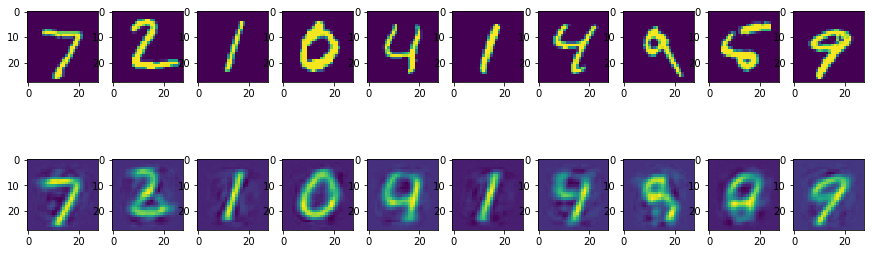

In [19]:
b,c = plt.subplots(nrows=2,ncols=10,figsize=(15, 5))

for i in range(num_of_test_images):
    
    c[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    c[1][i].imshow(np.reshape(test_result[i],(28,28)))